## Jaylene's Spotify Data  
### From 2021-06-26 to 2022-01-29

### Background:
This is about 1/2 of the total streaming history data from Jaylene's Spotify account. It was downloaded in JSON format. I'm using the later half of the data I recieved because I think it will be a more accurate view of my music tastes and will provide the most accurate information for hypothesis testing and predictions. 
This file has thousands of streams over the span of 6 months. 

Some quick predictions:
1. Top Artist: Taylor Swift
2. Second or thrid place: Lana Del Rey and Ariana Grande
3. Most popular genre (determined by api): Pop
4. Note: this data is not album specific, thus aritsts with more work may be statistically favored over smaller artists

### Loading the data:
The file is loaded into a pandas dataframe for easy processing! The file name is `StreamingHisotry`.  
Now, when the entire data is referenced, it will be under variable name `streams_df`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load JSON file into pandas DataFrame
streams_df = pd.read_json("StreamingHistory.json")   
# print(streams_df)   # test

### Exploring the Data:
Using the Pandas dataframe, we can look at the `artistName` column to find how often an artist was played. The oens with the most streams will be the most popular artists for this data set!


In [2]:
# Calculate the most commnly occuring artist & how many times the artist occurs
# use .value_counts() to see the top artist and how many times they occur
# print(streams_df["artistName"].value_counts().head(15), "###")    #test
# for i in streams_df.columns :  #  test, find unique values
#     print(i, streams_df[i].unique( ))

# How many times the most popular song was played:
print("###", streams_df["trackName"].value_counts(), "###")   # test
print(streams_df["trackName"].value_counts().head(15))
# for i in streams_df.columns :  #  test, find unique values, running the same thing as before for easy reading
#     print(i, streams_df[i].unique( ))

### mirrorball                152
exile (feat. Bon Iver)    145
brutal                    139
Jane                      137
drivers license           123
                         ... 
Take a Break                1
Believer                    1
Helpless                    1
Shut Up And Dance           1
emily                       1
Name: trackName, Length: 1443, dtype: int64 ###
mirrorball                                                                        152
exile (feat. Bon Iver)                                                            145
brutal                                                                            139
Jane                                                                              137
drivers license                                                                   123
epiphany                                                                          123
this is me trying                                                                 113
The Rose Song - 

### Artists and Corresponsing Genres:
Artist|Streams|Genre
-|-|-
Taylor Swift|2027|pop
Olivia Rodrigo|906|pop
Lana Del Rey|563|alternative
Billie Eilish|470|electro pop
Ariana Grande|285|dance pop
Brynn Cartelli|234|alternative
Ingrid Andress|176|country
Delaney Bailey|175|indie
Victorious Cast|173|dance pop
5 Seconds of Summer|159|pop
Catie Turner|140|alternative
Nicki Minaj|138|rap pop
Little Mix|121|dance pop
Britney Spears|116|pop
Pitbull|108|rap pop


### Interesting Observations: Most Played Song
Top Two:

1. mirrorball: 152
2. exile (feat. Bon Iver): 145

The top two songs of this data set are interesting because, while Taylor Swift is my most listened to artist, both of these songs are from 
the same album: Folklore. While it is one of her most recent albums, I expected #1 and #2 to be from her Reputation album. I feel like I listen to the Reputation album more than Folklore, simply I listen to that album more when studying. 


Top 3-5:

3. brutal: 139
4. Jane: 137
5. drivers license & epiphany (both tied): 123

My 4th most listened to song, Jane by Brynn Cartelli, ranks just under my most listened to top 3 songs even though this artist's total streams were more than 3x less any of the top 5 artists. Brynn Cartelli is also a very small artist that primarily promotes her music through social media like TikTok. To be so heavily competative with Taylor Swift and Olivia Rodrigo is surprising to me. It out ranked Billie Eilish as well!
I also think it's interesting that Mirrorball by Taylor Swift, is barely above Brutal, an Olivia Rodrigo song, since my Rodrigo streams were half of Swift's. The difference between the two songs is only 13 streams!

### Another Mention:
Many artists span multiple genres. However, I have chosen the most popular or first listed genre that was outputted by the API. In addition, some aritsts have more genres than they are listed as in the API. For example, Taylor Swift is only listed as a pop artist, dispite having a lot of country in her discography.

### Simple Stats:
Here we can see the simple stats about our data:

In [5]:
import pandas as pd
# must import this again bc won't run otherwise

streams_df = pd.read_json("StreamingHistory.json") 

# Average Listen Time Per Song
song_arr = streams_df["msPlayed"]
song_count = 0
length_total = 0
for lengths in song_arr:
    song_count += 1
    length_total += lengths
avg_listen_time_ms = length_total / song_count
avg_listen_time_minutes = avg_listen_time_ms / 60000 #since there are 60,000 milliseconds in a minute!
print("Average Listen Time Per Song (in minutes):", avg_listen_time_minutes)

# Longest Song
longest_song_ms = streams_df["msPlayed"].max()
longest_song_data = streams_df.loc[streams_df["msPlayed"] == longest_song_ms]
# print("Longest Song Listen Time Data:", longest_song_data)
# I know this song isnt actually the longest, as a I know this is only 5 minute song, and
# there are other songs nearing 9 minutes. I think it tracked this song for longer than 9 minutes due to 
# it possibly being replayed mid-song (AKA I replayed the song before it actually ended).

# Shortest Song
shortest_song_ms = streams_df["msPlayed"].min()
shortest_song_data = streams_df.loc[streams_df["msPlayed"] == shortest_song_ms]
# print("Shortest Song Listen Time Data:", shortest_song_data)
# the reason why there are so many of these is due to the fact of me skipping over a number of songs at once
# for example, I would listen to a "spotify radio" for so long it would turn to songs I didnt know, so I would imediately skip them.

# Average Letters Per Song Title
track_arr = streams_df["trackName"]
title_count = 0
total_letters = 0
for titles in track_arr:
    title_count += 1
    for letters in titles:
        total_letters += 1
avg_letters_per_title = total_letters / title_count
print("Average Letters Per Song Title:", avg_letters_per_title)

# Average Letters per Artist Name
artist_arr = streams_df["artistName"]
artist_count = 0
total_letters = 0
for artist in artist_arr:
    artist_count += 1
    for letters in artist:
        total_letters += 1
avg_letters_per_artist = total_letters / title_count
print("Average Letters Per Artist Name:", avg_letters_per_artist)

# Top Artists
top_15_artists = artist_arr.value_counts().head(15)
print("Top 15 Spotify Artists Based Off Songs Listened To:")
print(top_15_artists)

Average Listen Time Per Song (in minutes): 2.582107763883781
Average Letters Per Song Title: 17.122839279146746
Average Letters Per Artist Name: 11.863405663847002
Top 15 Spotify Artists Based Off Songs Listened To:
Taylor Swift           2027
Olivia Rodrigo          906
Lana Del Rey            563
Billie Eilish           470
Ariana Grande           285
Brynn Cartelli          234
Ingrid Andress          176
Delaney Bailey          175
Victorious Cast         173
5 Seconds of Summer     159
Catie Turner            140
Nicki Minaj             138
Little Mix              121
Britney Spears          116
Pitbull                 108
Name: artistName, dtype: int64


### Cleaning:
* Some of the things we changed:
    1. converted the data in column `endTime` from `YYYY-MM-DD` format into numbers by week. 
    2. preformed a groupby on the data that would calculate the percent of pop in each week
        - the percents were then put in a list for analysis in the first hypothesis testing problem
    3. converted the units from `msPlayed`, which are millseconds, into minutes&seconds into a seperate dataframe
        - this helped us with the second hypothesis testing and kNN classifier
    4. Rewrote all of the files from JSON to CSV format
        - also merged Carson and Jaylene's individual data into one master file titled: `merged_StreamingHistory.csv`

In [3]:
import pandas as pd
## read in the data file
# loading the file again for ease/testing
streams_df1 = pd.read_csv("StreamingHistory.csv")   # loaded in Jaylene's data

## change the date to per day, converting json to csv
## use the classifier from last DA to change these dates to numeric?
        # pretty sure already wrote code similar to this
streams_df1[ "WK" ] = pd.to_datetime(streams_df1["endTime"]).dt.isocalendar().week     #  reference: https://techtrekking.com/how-to-convert-daily-time-series-data-into-weekly-and-monthly-using-pandas-and-python/
# print("***", streams_df1, "***")              # test
streams_df1["endTime"] = streams_df1["WK"]      # overwrite column
streams_df1.drop(["WK"], axis=1)
# print(streams_df1)              # test
streams_df1.to_csv("YAY_Jaylene.csv", index= False)     # write to csv
streams_df1.drop("WK", inplace=True, axis=1)            # drop the new column called "wk"
sorted_streams = streams_df1.sort_values(by='endTime', ascending=True)
# print("***", sorted_streams)
# streams_df1.sort("endTime")	# test
sorted_streams.to_csv("YAY_Jaylene.csv", index= False)          # kinda updating!
## CODE REFERENCE
## link: https://www.geeksforgeeks.org/extract-week-number-from-date-in-pandas-python/
## another link: https://www.geeksforgeeks.org/convert-json-to-csv-in-python/

In [5]:
import statistics

## take in the cleaned data for weeks, calulate the percentage of pop listened to per weeks
# the artists the correspond to pop are:
# (FOR  JAYLENE DATA) = Taylor Swift, Olivia Rodrigo, 5 Seconds of Summer, Britney Spears

# create a loop to walk through each data point and say "if it's from this artist, then plus 1 to a count"
# take that count value, and divide it by len(data_set) * 100 = percentage of pop listened to per week

## total percent of pop
pop_artists_jaylene = ["Taylor Swift", "Olivia Rodrigo", "5 Seconds of Summer", "Britney Spears"]
count = 0
for i in streams_df1["artistName"]:
        if i in pop_artists_jaylene:
                count += 1
total_percent_of_pop = count/len(streams_df1["artistName"]) * 100
print("Total Percent of Pop forom Jaylene's Spotify: ", total_percent_of_pop)             # will print jaylene total = 23.59%

## percent of pop by week
# grouping by week:
by_week = streams_df1.groupby("endTime")
# print(by_week.groups.keys())
# print(len(by_week.groups.keys()))               # there are 32 weeks in total

for group_name, group_df, in by_week:           # test, will print all the different tables made by the groupby (for J's data = 32 tables)
	group_name = group_name		# this code/assigning variables looks wonky but if want the individual graphs and their names, can print them
	group_df = group_df			# print this variable if you want the subtables
	# print()
	# 2. test to see how many of the pop aritist are in each table
	count = [i for i in group_df["artistName"] if i in pop_artists_jaylene]		# list comprehension
	# print("***", len(count))	# test
	percent_by_week = len(count)/len(group_df["artistName"]) * 100
	# print(group_name, percent_by_week)


## percentage of pop listened to per week by jaylene (rounded to three decimals): 
pop_percent_by_week = [12.477, 8.897, 19.551, 26.975, 42.222, 48.936, 45.3125, 51.672, 32.390, 35.227, 35.000, 30.285, 
					34.117, 27.714, 31.218, 31.718, 41.954, 38.071, 29.411, 28.715, 29.191, 23.828, 25.321, 16.576, 
					18.006, 18.945, 15.099, 15.642, 9.549, 13.243, 10.337, 9.369]
# print(statistics.mean(pop_percent_by_week))		# test, mean = 26.780265625

Total Percent of Pop forom Jaylene's Spotify:  23.596910628907686


### Visualizations:
I have chosen to create a bar graph of my 15 top artists: how many times I have listened to the artist and the number of times my most listened song of theirs was played.
Also created a pie chart showing the percent of popularity for each genre. 

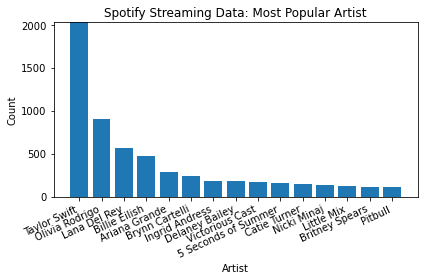

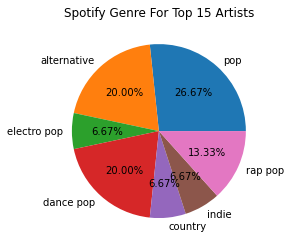

In [6]:
# I know I already imported these in a previous cell but it wouldn't run if I didn't import again... :(
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating the Graphs:

# creating a series for the top 5 artist:
# data inputed in increasing order:
num_of_streams = np.array([2027, 906, 563, 470, 285, 234, 176, 175, 173, 159, 140, 138, 121, 116, 108])    # total artist streams (all albums, all songs)
num_of_genre = np.array([4, 3, 1, 3, 1, 1, 2])
genre_for_artist = np.array(["pop", "alternative", "electro pop", "dance pop", "country", "indie", "rap pop"])
artist_for_streams = ["Taylor Swift", "Olivia Rodrigo", "Lana Del Rey", "Billie Eilish", "Ariana Grande", "Brynn Cartelli", "Ingrid Andress", "Delaney Bailey", "Victorious Cast", "5 Seconds of Summer", "Catie Turner", "Nicki Minaj", "Little Mix", "Britney Spears", "Pitbull"]
artist_ser = pd.Series(num_of_streams, index=artist_for_streams)
# genre_ser = pd.Series(genre_for_artist, index=artist_for_streams)
# print(artist_ser)   #test


def bar_chart(x_ser, y_ser, title, graph):        
    plt.bar(x_ser, y_ser)           
    # beautify the plot
    # fix overlapaping x-axis labels, put them at a slant instead of all overlapping horizontally
    plt.xticks(rotation = 25, ha = "right")
    # labeling the axes
    plt.xlabel("Artist")
    plt.ylabel("Count") 
    plt.ylim([0, y_ser.max()])
    plt.title(title)       # to add a title
    # print(y_ser)    #test
    plt.tight_layout()
    plt.savefig(graph)
    plt.show()    # test

def pie_chart(x_ser, y_ser):
    plt.figure() # will create a new "current" figure
    plt.title("Spotify Genre For Top 15 Artists")
    plt.pie(y_ser, labels=x_ser, autopct="%.2f%%")      # pass in only y_ser because that has the acutal counts of the data... use x_ser as the labels, autppct = auto percent... how to automatically display percentages for pie sectors. the %% will display two decimal places i think... either way just keep the formatting of it the same
    plt.savefig("Genre_Chart.png")

# Bar Graph:
# call bar_chart 
bar_chart(artist_for_streams, artist_ser, "Spotify Streaming Data: Most Popular Artist", "Most_Popular_Artist.png")     # calling graph for total of all streams from an artist(spanning multiple albums)
# Pie Chart:
pie_chart(genre_for_artist, num_of_genre)

### Hypothesis Testing:
Is Jaylene's streaming history going to consist of 1/4 or more pop music from the given time frame of 2021-06-26 to 2022-01-29? 
- took top 15 artists and found their genre
- pop occurs 4 times as the genre of the top artists, making it the most listened to genre
- Note: pop doesn't include any pop spin offs... e.g. no electro pop.
- Uses the 5 step hypothsis testing method
- measured in weeks (32 total)
- the data points are measured in percent. Thus, 25% = 25, 50 = 50%, etc


1. Identify null and alternative hypothesis  
- H0: M(pop) $\le$ 25  
- H1: M(pop) $>$ 25

2. Level of significance  
$ \alpha = 0.01 $

3. Select test statistic:
test statistic: $$ t = \frac{\overline{x} - \mu }{\frac{s}{\sqrt{n}}} $$

4. Computations:
- is a right tailed test 
- df = 32-1 = 31 (because there are 32 weeks in this data set)
- t-table value = 2.45
- if t-computed > 2.45 then we reject H0. If t-commputed is less than or equal to 2.45, then we cannot reject H0.
- this results in: $$ t = \frac{26.78 - 25}{\frac{12.037}{\sqrt{32}}} $$ $$ t (computed) = 0.836 $$    

5. Decision:  
At a level of 0.01 significance, we cannot reject H0 since t-computed (0.836) is not > t-critical (2.45). Therefore, Jaylene's streaming time does not consist of 25% or more of pop.

- double check work with python code:

In [11]:
from scipy import stats
import numpy as np
# let's check our work with scipy
pop_percent_by_week = [12.477, 8.897, 19.551, 26.975, 42.222, 48.936, 45.3125, 51.672, 32.390, 35.227, 35.000, 30.285, 
					34.117, 27.714, 31.218, 31.718, 41.954, 38.071, 29.411, 28.715, 29.191, 23.828, 25.321, 16.576, 
					18.006, 18.945, 15.099, 15.642, 9.549, 13.243, 10.337, 9.369]
len_pop_percent_by_week = len(pop_percent_by_week)
std = np.std(pop_percent_by_week, ddof=1)
mean = np.mean(pop_percent_by_week)
print("len", len_pop_percent_by_week,"mean", mean,"std", std)     # test
t, pval = stats.ttest_1samp(pop_percent_by_week, 25)
pval /= 2      # p-value = the probablity that this sample comes from this distribution
print("t:", t, "pval", pval)
alpha = 0.01
if pval < alpha:
    print("reject H0")
else: 
    print("do not reject H0")

len 32 mean 26.780265625 std 12.037935601594446
t: 0.836580581530322 pval 0.20461556383362506
do not reject H0


### Conclusion:
Overall, my top 15 artists were heavily centered around pop music. However, based on the table of streams and the hypothesis testing above, we cannot conclude that I am more likely to listen to pop more than any other genre. Because of this, one of my initial predictions was wrong. I think it's interesting how there are many different versions of pop!

However, some of my initial predictions were correct. For example, my favorite artist was clearly Taylor Swift and my thrid artist was Lana Del Rey!

### Sources: 
- Dr. Sprint's API: see links in the `apotify_api_demo.py` file
    - this source was used to get the genres for each artist
- Spotify data request: https://support.spotify.com/us/article/data-rights-and-privacy-settings/
    - how to request the data
- Spotify description of received data: https://support.spotify.com/au/article/understanding-my-data/ 
    - readMe information that was useful when cleaning and sorting data